# [**Courbe de trade-off d'erreur de détection (DET)**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/3_model_selection/plot_det.ipynb)<br/>([_Detection error tradeoff (DET) curve_](https://scikit-learn.org/stable/auto_examples/model_selection/plot_det.html))

Dans cet exemple, nous comparons deux métriques de classification binaire multi-seuils : la courbe de caractéristiques de fonctionnement du récepteur (ROC) et la courbe de trade-off d'erreur de détection (DET). À cette fin, nous évaluons deux classifieurs différents pour la même tâche de classification.

Les courbes ROC présentent le taux de vrais positifs (TPR) sur l'axe Y et le taux de faux positifs (FPR) sur l'axe X. Cela signifie que le coin supérieur gauche du graphique est le point "idéal" - un FPR de zéro et un TPR de un.

Les courbes DET sont une variation des courbes ROC où le taux de faux négatifs (FNR) est tracé sur l'axe des y au lieu du TPR. Dans ce cas, l'origine (coin inférieur gauche) est le point "idéal".

> **Note :**
> - Consultez [**`sklearn.metrics.roc_curve`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) pour plus d'informations sur les courbes ROC.
> - Consultez [**`sklearn.metrics.det_curve`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.det_curve.html) pour plus d'informations sur les courbes DET.
> - Cet exemple est vaguement basé sur l'exemple [**Comparer les classificateurs**](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py).
> - Voir [**Caractéristique de fonctionnement du récepteur (ROC) avec validation croisée**](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py) pour un exemple estimant la variance des courbes ROC et ROC-AUC.

# Générer des données synthétiques

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(
    n_samples=1_000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Définir les classifieurs

Ici, nous définissons deux classifieurs différents. L'objectif est de comparer visuellement leurs performances statistiques à travers différents seuils en utilisant les courbes ROC et DET. Il n'y a aucune raison particulière pour laquelle ces classifieurs sont choisis, il s'agit simplement de deux exemples parmi les nombreux classifieurs disponibles dans scikit-learn.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

classifiers = {
    "Linear SVM": make_pipeline(StandardScaler(), LinearSVC(C=0.025, dual="auto")),
    "Random Forest": RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1
    ),
}

# Tracer les courbes ROC et DET

Les courbes DET sont généralement tracées sur une échelle de déviation normale. Pour ce faire, l'affichage DET transforme les taux d'erreur tels que renvoyés par [**`det_curve`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.det_curve.html) et l'échelle des axes à l'aide de `scipy.stats.norm`.

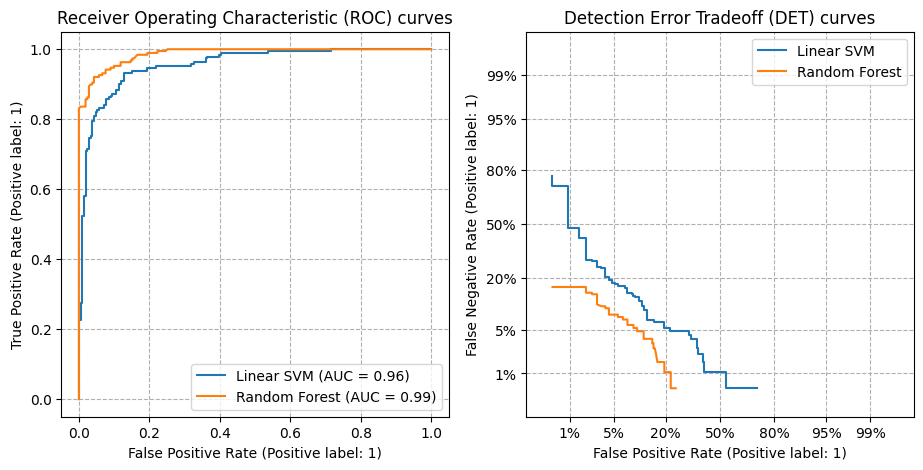

In [3]:
import matplotlib.pyplot as plt

from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()

Remarquez qu'il est plus facile d'évaluer visuellement les performances globales de différents algorithmes de classification à l'aide des courbes DET que des courbes ROC. Les courbes ROC étant tracées sur une échelle linéaire, différents classifieurs apparaissent généralement similaires sur une grande partie du graphique et diffèrent le plus dans le coin supérieur gauche du graphique. En revanche, parce que les courbes DET représentent des lignes droites dans une échelle de déviation normale, elles ont tendance à être distinguables dans leur ensemble et la zone d'intérêt couvre une grande partie du graphique.

Les courbes DET fournissent des commentaires directs sur le trade-off d'erreur de détection pour aider à l'analyse du point de fonctionnement. L'utilisateur peut ensuite décider du FNR qu'il est prêt à accepter au détriment du FPR (ou vice-versa).